First, we must import the training data csv file into a 2-D python array. Because this data seems to be DNA codon sequences, we should split the right column of the data up into groups of 3 codons.

In [2]:
t_data = open("C:/Users/Adam/Desktop/training.data")
train = t_data.readlines()
for i,line in enumerate(train):
    train[i] = line.strip().split(",")
    for j in range(0,len(train[i][1]),3):
        train[i].append(train[i][1][j:j+3])
    train[i].pop(1)
print(train[0])

['1', 'CTC', 'ATT', 'GAA', 'ACA', 'GCT', 'ATA', 'TTT', 'CTT', 'TTT', 'CAG', 'ATT', 'AGT', 'GAT', 'GAT', 'GAA', 'CCA', 'GGT', 'TAT', 'GAC', 'CTT']


Now, we should split the data into a data vector and a label vector.

In [3]:
train_data = []
train_labels = []
for row in train:
    train_labels.append(row[0])
    train_data.append(row[1:])
print(train_labels[0])
print(train_data[0])


1
['CTC', 'ATT', 'GAA', 'ACA', 'GCT', 'ATA', 'TTT', 'CTT', 'TTT', 'CAG', 'ATT', 'AGT', 'GAT', 'GAT', 'GAA', 'CCA', 'GGT', 'TAT', 'GAC', 'CTT']


In biology, the purpose of codons is to code for the production of 20 different amino acids. We can reduce the dimensionality of the data vector by converting the vector of lists of 3 letters into lists of the amino acids that those groups of codons code for. We need to create a dictionary mapping each group of three letters to the amino acid that it codes for. Then we can represent each of those amino acids as a number ranging from 0 to 19. If there are any typos in the data that include a letter that is not A, T, C, or G, the group of codons that contains that letter will just be assigned to an imaginary amino acid 21 for the sake of keeping that data entry while minimizing the affect of the typo.

In [4]:
amino_acids_to_codons ={
    "Phe":["TTT","TTC"],
    "Leu":["TTA","TTG","CTT","CTC","CTA","CTG"],
    "Ile":["ATT","ATC","ATA"],
    "Met":["ATG"],
    "Val":["GTT","GTC","GTA","GTG"],
    "Ser":["TCT","TCC","TCA","TCG","AGT","AGC"],
    "Pro":["CCC","CCT","CCA","CCG"],
    "Thr":["ACT","ACC","ACA","ACG"],
    "Ala":["GCT","GCC","GCA","GCG"],
    "Tyr":["TAT","TAC"],
    "Stop":["TAA","TAG","TGA"],
    "His":["CAT","CAC"],
    "Gln":["CAA","CAG"],
    "Asn":["AAT","AAC"],
    "Lys":["AAA","AAG"],
    "Asp":["GAT","GAC"],
    "Glu":["GAA","GAG"],
    "Cys":["TGT","TGC"],
    "Trp":["TGG"],
    "Arg":["CGT","CGC","CGA","CGG","AGA","AGG"],
    "Gly":["GGT","GGC","GGA","GGG"]
}

codons_to_amino_acids = {}
for i, amino in enumerate(amino_acids_to_codons):
    for codon in amino_acids_to_codons[amino]:
        codons_to_amino_acids[codon] = i
print(amino_acids_to_codons)
print(codons_to_amino_acids)

{'Phe': ['TTT', 'TTC'], 'Leu': ['TTA', 'TTG', 'CTT', 'CTC', 'CTA', 'CTG'], 'Ile': ['ATT', 'ATC', 'ATA'], 'Met': ['ATG'], 'Val': ['GTT', 'GTC', 'GTA', 'GTG'], 'Ser': ['TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC'], 'Pro': ['CCC', 'CCT', 'CCA', 'CCG'], 'Thr': ['ACT', 'ACC', 'ACA', 'ACG'], 'Ala': ['GCT', 'GCC', 'GCA', 'GCG'], 'Tyr': ['TAT', 'TAC'], 'Stop': ['TAA', 'TAG', 'TGA'], 'His': ['CAT', 'CAC'], 'Gln': ['CAA', 'CAG'], 'Asn': ['AAT', 'AAC'], 'Lys': ['AAA', 'AAG'], 'Asp': ['GAT', 'GAC'], 'Glu': ['GAA', 'GAG'], 'Cys': ['TGT', 'TGC'], 'Trp': ['TGG'], 'Arg': ['CGT', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'], 'Gly': ['GGT', 'GGC', 'GGA', 'GGG']}
{'TTT': 0, 'TTC': 0, 'TTA': 1, 'TTG': 1, 'CTT': 1, 'CTC': 1, 'CTA': 1, 'CTG': 1, 'ATT': 2, 'ATC': 2, 'ATA': 2, 'ATG': 3, 'GTT': 4, 'GTC': 4, 'GTA': 4, 'GTG': 4, 'TCT': 5, 'TCC': 5, 'TCA': 5, 'TCG': 5, 'AGT': 5, 'AGC': 5, 'CCC': 6, 'CCT': 6, 'CCA': 6, 'CCG': 6, 'ACT': 7, 'ACC': 7, 'ACA': 7, 'ACG': 7, 'GCT': 8, 'GCC': 8, 'GCA': 8, 'GCG': 8, 'TAT': 9, 'TAC': 9, 

In [5]:
def numerical(data, key):
    for i,row in enumerate(data):
        for j,codon in enumerate(row):
            if codon not in key: #Inevitably there will be typos in the data, so we assign any nonsensical codons to imaginary amino acid "21".
                data[i][j] = 21
            else:
                data[i][j] = key[codon]

numerical(train_data, codons_to_amino_acids)
print(train_data[0])

[1, 2, 16, 7, 8, 2, 0, 1, 0, 12, 2, 5, 15, 15, 16, 6, 20, 9, 15, 1]


Now, we can put the data into a pandas dataframe and shuffle it before we split it into a validation and training set.

In [6]:
import pandas as pd
import random

train_data_df = pd.DataFrame(train_data)
train_data_df["Labels"] = train_labels
train_data_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Labels
0,1,2,16,7,8,2,0,1,0,12,...,5,15,15,16,6,20,9,15,1,1
1,5,7,5,5,1,19,1,0,2,10,...,6,14,6,15,16,14,9,9,5,1
2,14,5,2,1,19,1,0,1,11,12,...,5,8,6,6,6,15,20,15,1,1
3,8,8,12,7,9,1,1,1,1,12,...,9,14,17,11,6,20,19,6,12,1
4,20,2,0,7,1,14,0,6,1,12,...,7,5,17,1,17,1,20,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782,15,5,6,4,1,15,4,12,3,12,...,5,20,0,14,2,16,13,6,7,2
2783,6,12,1,7,8,12,9,8,15,5,...,8,9,10,15,5,6,16,13,9,2
2784,16,1,12,12,5,19,2,19,2,15,...,1,5,8,12,1,5,12,1,12,2
2785,4,5,6,1,6,17,3,18,10,13,...,19,4,7,0,7,1,13,1,10,2


In [7]:
import numpy as np

def val_split(df, split):
    
    X = df.to_numpy()
    np.random.shuffle(X)
    y = X.T[-1]
    X = X.T[:-1]
    X = X.T
    
    split = int(split*len(train_data))

    X_train = X[:split]
    y_train = y[:split]
    
    X_val = X[split:]
    y_val = y[split:]
    
    return X_train,y_train,X_val,y_val

In [8]:
Xt, yt, Xv, yv = val_split(train_data_df, 0.85)

ttd_df = pd.DataFrame(Xt)
ttd_df["Labels"] = yt

tvd_df = pd.DataFrame(Xv)
tvd_df["Labels"] = yv

ttd_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Labels
0,4,5,11,1,10,6,1,1,0,12,...,15,14,15,8,0,9,4,8,15,1
1,15,5,9,19,14,12,4,4,2,15,...,16,7,17,1,1,15,2,1,15,2
2,15,6,8,4,8,2,12,6,1,6,...,15,0,20,1,10,20,20,8,17,2
3,15,6,19,6,8,18,8,18,8,1,...,20,1,4,1,4,5,0,5,4,0
4,14,0,20,1,16,20,12,13,10,4,...,9,10,10,2,8,19,5,17,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,1,16,2,13,0,1,13,4,14,12,...,20,8,16,11,10,8,1,14,19,0
2364,19,12,6,8,19,19,19,19,1,20,...,5,1,12,1,14,20,8,20,17,2
2365,5,14,8,1,1,4,1,7,1,8,...,18,1,12,5,1,7,8,5,19,2
2366,5,19,8,6,19,8,1,19,4,15,...,4,20,16,8,0,20,7,20,8,2


In [8]:
tvd_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Labels
0,19,16,19,19,15,13,9,4,6,16,...,13,0,1,15,2,18,8,5,20,0
1,8,19,15,12,15,1,8,7,16,8,...,19,6,7,2,13,19,1,7,19,2
2,6,20,5,5,11,1,5,0,6,12,...,5,5,8,18,17,10,3,8,16,1
3,15,20,20,0,4,9,2,8,20,14,...,20,1,4,6,4,1,8,16,13,2
4,8,13,5,1,8,5,1,5,1,12,...,7,8,8,19,5,6,6,19,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,7,1,1,5,1,5,6,5,1,12,...,7,1,14,1,19,20,5,5,5,1
415,8,3,16,15,16,6,5,13,15,13,...,5,6,11,8,10,6,20,13,5,0
416,6,10,1,6,20,1,17,8,0,12,...,20,17,8,16,11,17,5,1,13,1
417,18,15,7,10,12,3,12,17,8,7,...,17,0,2,8,13,1,0,10,11,2


Before we start testing models, we should find a way to measure the accuracy of the model. I implemented this with the accuracy_score function in sklearn.

In [9]:
from sklearn.metrics import accuracy_score

def print_acc(true, pred):
    print(accuracy_score(true, pred))

First, we test how well a basic linear support vector machine can predict on new data.

In [10]:
from sklearn import svm

clf_svm = svm.LinearSVC()
clf_svm.fit(Xt, yt)

pred_svm = clf_svm.predict(Xv)
print_acc(yv, pred_svm)

0.43914081145584727


C:\Users\Adam\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


With an accuracy of just above 50%, the SVM will not be the model that we use. Next we can try a decision tree.

0.8758949880668258


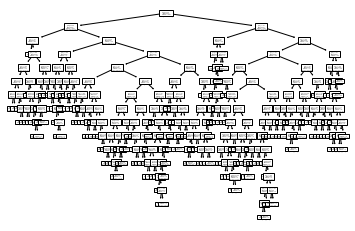

In [11]:
from sklearn import tree

clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(Xt, yt)
tree.plot_tree(clf_dt)

pred = clf_dt.predict(Xv)

print_acc(yv, pred)

With an accuracy of roughly 87%, the classification tree model works much better than the SVM, but I am still not satisfied with an accuracy of 87%. next we can try a Random Forest Classifier to use bagging to try to get a better accuracy score.

In [12]:
from sklearn.ensemble import RandomForestClassifier

clf_rfc = RandomForestClassifier(n_estimators = 20)
clf_rfc = clf_rfc.fit(Xt, yt)

pred_rfc = clf_rfc.predict(Xv)
print_acc(yv, pred_rfc)

0.9140811455847255


At 89% accuracy, the Random Forest model is slightly better that the classification tree model. Lets try the AdaBoost classifier to see if boosting can give us a better accuracy.

In [13]:
from sklearn.ensemble import AdaBoostClassifier

clf_ada = AdaBoostClassifier(n_estimators = 30)
clf_ada = clf_ada.fit(Xt,yt)

pred_ada = clf_ada.predict(Xv)
print_acc(yv, pred_ada)

0.883054892601432


The AdaBoost classifier has essentially the same accuracy as the Random Forest method, so this method is no better. Next, lets try to use a Neural Network to get a better accuracy.

In [14]:
from sklearn.neural_network import MLPClassifier

clf_nn = MLPClassifier(activation='relu', solver='adam', max_iter=500)
clf_nn.fit(Xt,yt)

pred_nn = clf_nn.predict(Xv)
print_acc(yv, pred_nn)

0.7517899761336515


C:\Users\Adam\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


The neural network performed worse than all of the other methods other than the Linear SVM. Maybe we can alter our data in such a way that makes it easier for the neural network to read. To do this, we can use one hot encoding to transform each data entry into a matrix where the rows represent the amino acids and the columns represent the columns in the entry. This transforms our data into a grid of only 1s and 0s, where there is a 1 at position (row, column) if there is the amino acid represented by that row in that column of the data, and a 0 otherwise.

In [24]:
from sklearn.preprocessing import OneHotEncoder

X = np.concatenate((Xt, Xv), axis=0)

enc_oh = OneHotEncoder().fit(X)
Xt_oh = enc_oh.transform(Xt).toarray()
Xv_oh = enc_oh.transform(Xv).toarray()

clf_nn = MLPClassifier(activation='relu', solver='adam', max_iter=200)
clf_nn.fit(Xt_oh,yt)

pred_nn = clf_nn.predict(Xv_oh)
print_acc(yv, pred_nn)

0.9116945107398569


In [31]:
[coef.shape for coef in clf_nn.coefs_]

[(436, 100), (100, 3)]

This method works much better than any other method with an accuracy of 93%. Now, we can train the model on the entire training dataset and use that model to predict on the test dataset.

In [17]:
test = open("C:/Users/Adam/Desktop/test.data")
test_dt = test.readlines()
test_ds = []
for i,line in enumerate(test_dt):
    test_ds.append([line.strip()])
    for j in range(0,len(test_ds[i][0]),3):
        test_ds[i].append(test_ds[i][0][j:j+3])
    test_ds[i].pop(0)

    

test_df = pd.DataFrame(test_ds)

test_df

    

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,CTG,GTG,TGA,ATG,GCA,TTC,TCT,TTT,TTG,CAG,ACA,GAG,GAG,CTG,AAC,CGC,GAG,GTG,GCC,ACC
1,CAA,ACG,CCA,AAC,CTG,CTA,TCT,CCT,TTG,CAG,GGC,GAT,TCG,GGA,GGC,CCC,CTG,GTG,TGT,CTG
2,TTT,TCC,CAT,CAT,CCT,GTA,CTT,CTT,TTC,TAG,ATG,TCA,GCC,AGG,AAG,ATG,TTC,CCC,TCG,TAA
3,AGG,GCC,CCT,TAC,GTT,CCC,CTC,TTT,TCC,CAG,AGC,CGG,CTT,CCC,AGC,CCA,CCA,TCC,CCA,TCG
4,CCA,CTC,TAT,TTG,CAT,TTT,GTT,GCA,TTT,CAG,AGG,AAC,ATC,AAG,AAA,TCA,TGA,ACA,ACT,TTG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,TTG,AAG,TTG,CCT,AGA,CCA,GAG,GAC,ATA,AGT,ATC,ATG,TCT,CCT,TTA,ACT,AGC,ATA,CCC,CGA
399,TAA,CTT,TCA,GGC,TGT,ACA,AAA,TGG,CAG,TTG,GAT,TTA,TGC,TTG,CTC,ATC,CTT,ATG,GAT,TTA
400,GAG,AAA,AGC,CCG,TCT,GTT,TGC,AGC,CCT,CTG,AAC,ATG,ACA,TCT,TCG,GTT,TGC,AGC,CCT,GCT
401,AGG,TGT,GCA,TCA,CCT,TTG,ACC,AGG,CTG,ACC,TGA,CCA,TCA,AGC,TGC,CAG,ACG,GAC,ATG,AAT


In [18]:
y = np.concatenate((yt, yv), axis=0)

X_oh = enc_oh.transform(X).toarray()

clf_nn_fin = MLPClassifier(activation='relu', solver='adam', max_iter=200).fit(X_oh, y)

In [19]:
numerical(test_ds, codons_to_amino_acids)

test_arr = np.array(test_ds)

test_oh = enc_oh.transform(test_arr)

pred_fin = clf_nn_fin.predict(test_oh)

pred_nn_df = pd.DataFrame(pred_fin,columns=["Multi-Layer Perceptron Prediction"])

pred_nn_df

,Multi-Layer Perceptron Prediction
0,1
1,1
2,1
3,1
4,1
...,...
398,2
399,2
400,2
401,2


In [24]:
pred_nn_df.to_csv("C:/Users/Adam/Desktop/HW5_results.csv")